In [1]:
clear()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os

In [2]:
os.chdir('/Users/ericwang/Desktop/ECON_148/L4/full_data')

In [3]:
data = pd.read_csv("pulse2022_puf_51.csv")
print( 'Data set size: ', len( data ) )

Data set size:  61453


In [15]:
data.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,...,FRMLA_TYP4,GAS1,GAS2,GAS3,GAS4,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,SUMMER_ED5
0,V510000001,51,34,35620.0,1,1443.711630,5636.201993,1973,2,1,...,-88,1,1,-99,-99,-88,-88,-88,-88,-88
1,V510000002,51,8,NaN,4,972.449233,952.102570,1945,2,1,...,-88,-99,-99,-99,1,-88,-88,-88,-88,-88
2,V510000003,51,51,47900.0,2,110.034986,211.642852,1975,2,1,...,-88,-99,-99,-99,1,-99,-99,-99,1,-99
3,V510000004,51,20,NaN,3,752.027703,1385.367189,1986,2,1,...,-88,1,1,-99,-99,-88,-88,-88,-88,-88
4,V510000005,51,1,NaN,2,1199.873552,2392.803557,1948,2,1,...,-88,-99,-99,-99,1,-88,-88,-88,-88,-88


In [54]:
data.columns

Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'REGION', 'HWEIGHT', 'PWEIGHT',
       'TBIRTH_YEAR', 'ABIRTH_YEAR', 'RHISPANIC',
       ...
       'FRMLA_TYP4', 'GAS1', 'GAS2', 'GAS3', 'GAS4', 'SUMMER_ED1',
       'SUMMER_ED2', 'SUMMER_ED3', 'SUMMER_ED4', 'SUMMER_ED5'],
      dtype='object', length=244)

In [55]:
data.dtypes

SCRAM          object
WEEK            int64
EST_ST          int64
EST_MSA       float64
REGION          int64
               ...   
SUMMER_ED1      int64
SUMMER_ED2      int64
SUMMER_ED3      int64
SUMMER_ED4      int64
SUMMER_ED5      int64
Length: 244, dtype: object

In [56]:
for k in range(len(data.dtypes)):
    print( data.columns[k],data.dtypes[k] )

SCRAM object
WEEK int64
EST_ST int64
EST_MSA float64
REGION int64
HWEIGHT float64
PWEIGHT float64
TBIRTH_YEAR int64
ABIRTH_YEAR int64
RHISPANIC int64
AHISPANIC int64
RRACE int64
ARACE int64
EEDUC int64
AEDUC int64
MS int64
EGENID_BIRTH int64
AGENID_BIRTH int64
GENID_DESCRIBE int64
SEXUAL_ORIENTATION int64
THHLD_NUMPER int64
AHHLD_NUMPER int64
THHLD_NUMKID int64
AHHLD_NUMKID int64
THHLD_NUMADLT int64
KIDS_LT5Y int64
KIDS_5_11Y int64
KIDS_12_17Y int64
ENRPUBCHK int64
ENRPRVCHK int64
ENRHMSCHK int64
TENROLLPUB int64
TENROLLPRV int64
TENROLLHMSCH int64
ENROLLNONE int64
ACTVDUTY1 int64
ACTVDUTY2 int64
ACTVDUTY3 int64
ACTVDUTY4 int64
ACTVDUTY5 int64
RECVDVACC int64
NUMDOSES int64
BOOSTERRV int64
WHYNOBSTR1 int64
WHYNOBSTR2 int64
WHYNOBSTR3 int64
WHYNOBSTR4 int64
WHYNOBSTR5 int64
WHYNOBSTR6 int64
WHYNOBSTR7 int64
WHYNOBSTR8 int64
WHYNOBSTR9 int64
KIDDOSESRV int64
KIDDOSESRV_LT5Y int64
KIDDOSESRV_5_11Y int64
KIDDOSESRV_12_17Y int64
KIDBSTR_LT5Y float64
KIDBSTR_5_11Y int64
KIDBSTR_12_17Y int64


In [57]:
sum(data['TSPNDFOOD']<0)/len(data['TSPNDFOOD'])

0.1425967812800026

In [58]:
data['TSPNDFOOD']>=0

0         True
1         True
2         True
3         True
4        False
         ...  
61448     True
61449     True
61450     True
61451     True
61452     True
Name: TSPNDFOOD, Length: 61453, dtype: bool

In [59]:
# delete rows whose TSPNDFOOD < 0
data=data[data['TSPNDFOOD']>=0]

In [60]:
data['TSPNDFOOD'].describe()

count    52690.000000
mean       230.144050
std        163.810784
min          0.000000
25%        120.000000
50%        200.000000
75%        300.000000
max        900.000000
Name: TSPNDFOOD, dtype: float64

(array([ 6748., 16000., 14286.,  7730.,  2919.,  2420.,   874.,   453.,
          504.,   756.]),
 array([  0.,  90., 180., 270., 360., 450., 540., 630., 720., 810., 900.]),
 <BarContainer object of 10 artists>)

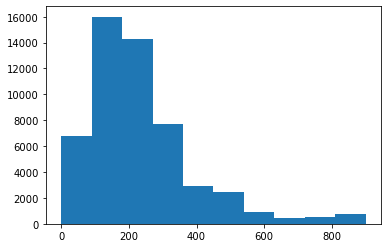

In [61]:
plt.hist(data['TSPNDFOOD'])

In [62]:
y=data['TSPNDFOOD']

In [63]:
y.describe()

count    52690.000000
mean       230.144050
std        163.810784
min          0.000000
25%        120.000000
50%        200.000000
75%        300.000000
max        900.000000
Name: TSPNDFOOD, dtype: float64

(array([ 6748., 16000., 14286.,  7730.,  2919.,  2420.,   874.,   453.,
          504.,   756.]),
 array([  0.,  90., 180., 270., 360., 450., 540., 630., 720., 810., 900.]),
 <BarContainer object of 10 artists>)

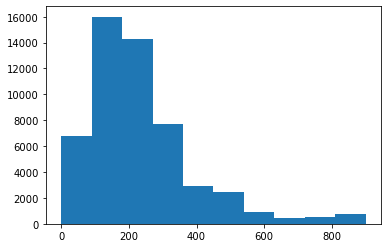

In [64]:
plt.hist(y)

In [65]:
y

0         40
1        100
2        400
3        100
5        200
        ... 
61448    400
61449    115
61450    300
61451    200
61452    150
Name: TSPNDFOOD, Length: 52690, dtype: int64

In [66]:
data.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,...,FRMLA_TYP4,GAS1,GAS2,GAS3,GAS4,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,SUMMER_ED5
0,V510000001,51,34,35620.0,1,1443.711630,5636.201993,1973,2,1,...,-88,1,1,-99,-99,-88,-88,-88,-88,-88
1,V510000002,51,8,NaN,4,972.449233,952.102570,1945,2,1,...,-88,-99,-99,-99,1,-88,-88,-88,-88,-88
2,V510000003,51,51,47900.0,2,110.034986,211.642852,1975,2,1,...,-88,-99,-99,-99,1,-99,-99,-99,1,-99
3,V510000004,51,20,NaN,3,752.027703,1385.367189,1986,2,1,...,-88,1,1,-99,-99,-88,-88,-88,-88,-88
5,V510000006,51,25,14460.0,1,783.749170,1465.381843,1985,2,1,...,-88,-99,-99,-99,1,-88,-88,-88,-88,-88


In [67]:
data['age']=2023-data['TBIRTH_YEAR']

In [68]:
data.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,...,GAS1,GAS2,GAS3,GAS4,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,SUMMER_ED5,age
0,V510000001,51,34,35620.0,1,1443.711630,5636.201993,1973,2,1,...,1,1,-99,-99,-88,-88,-88,-88,-88,50
1,V510000002,51,8,NaN,4,972.449233,952.102570,1945,2,1,...,-99,-99,-99,1,-88,-88,-88,-88,-88,78
2,V510000003,51,51,47900.0,2,110.034986,211.642852,1975,2,1,...,-99,-99,-99,1,-99,-99,-99,1,-99,48
3,V510000004,51,20,NaN,3,752.027703,1385.367189,1986,2,1,...,1,1,-99,-99,-88,-88,-88,-88,-88,37
5,V510000006,51,25,14460.0,1,783.749170,1465.381843,1985,2,1,...,-99,-99,-99,1,-88,-88,-88,-88,-88,38


(array([1943., 5114., 6497., 6864., 6385., 6635., 7760., 7077., 3466.,
         949.]),
 array([19., 26., 33., 40., 47., 54., 61., 68., 75., 82., 89.]),
 <BarContainer object of 10 artists>)

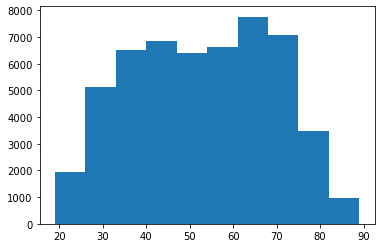

In [69]:
plt.hist(data['age'])

In [71]:
X=data[['age']]
y=data['TSPNDFOOD']
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_, reg.score(X, y))

288.8729747939959 [-1.11780043] 0.012168633853434141


In [73]:
X=data[['age','RRACE']]
y=data['TSPNDFOOD']
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_, reg.score(X, y))

274.11126608768024 [-1.07196632  9.49057464] 0.014134013847114324


In [74]:
data['RRACE'].describe()

count    52690.000000
mean         1.301670
std          0.769169
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: RRACE, dtype: float64

In [75]:
sum(data['RRACE']==1)/len(data['RRACE'])

0.8398367811728981

(array([44251.,     0.,     0.,  3563.,     0.,     0.,  2296.,     0.,
            0.,  2580.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

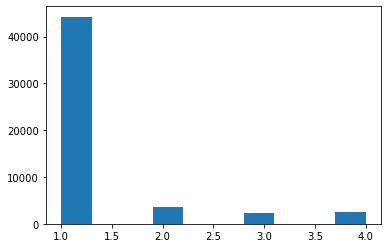

In [76]:
plt.hist(data['RRACE'])

In [78]:
X_reg=pd.get_dummies(X, columns=['RRACE'], drop_first=True)
X_reg.head()

,age,RRACE_2,RRACE_3,RRACE_4
0,50,0,0,0
1,78,0,0,0
2,48,0,0,0
3,37,0,0,0
5,38,0,0,0


In [79]:
reg = LinearRegression().fit(X_reg, y)
print(reg.intercept_, reg.coef_, reg.score(X_reg,y))

283.23111501625385 [-1.06578928  6.56513636 30.74174641 22.98897971] 0.014434592459840356


In [80]:
X=data[['age','RRACE','EEDUC','MS']] # age, race, education, marital status
y=data['TSPNDFOOD']
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_, reg.score(X, y))

293.1950679677019 [-1.14155154  9.5249165  -2.2164639  -1.82651818] 0.01792568762151525


In [81]:
X_reg=pd.get_dummies(X, columns=['RRACE','EEDUC','MS'], drop_first=True)

In [82]:
X_reg

,age,RRACE_2,RRACE_3,RRACE_4,EEDUC_2,EEDUC_3,EEDUC_4,EEDUC_5,EEDUC_6,EEDUC_7,MS_1,MS_2,MS_3,MS_4,MS_5
0,50,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,78,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,48,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,37,0,0,0,0,0,0,0,0,1,1,0,0,0,0
5,38,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61448,63,0,0,0,0,0,0,1,0,0,1,0,0,0,0
61449,51,0,0,0,0,0,0,0,1,0,1,0,0,0,0
61450,44,0,0,0,0,0,0,0,1,0,1,0,0,0,0
61451,39,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [83]:
reg = LinearRegression().fit(X_reg, y)
print(reg.intercept_, reg.coef_, reg.score(X_reg,y))

371.1142459917841 [ -1.59338208  20.3012343   30.84976797  27.53828628 -21.86569812
 -60.61714681 -68.29177548 -67.87489437 -75.56134704 -75.22955035
  40.75661339 -20.67882171 -16.19581547   7.46628055 -49.68000998] 0.06600230257813666
